In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [25]:
# Read dataset
# Membaca dataset dari file Excel
df = pd.read_excel('dataKesehatan.xlsx')

# Melihat beberapa baris pertama dari dataset
df.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [27]:
# Melihat informasi umum tentang dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
 12  Unnamed: 12           

In [28]:
# Melihat jumlah nilai yang hilang di setiap kolom
print(df.isnull().sum())

NO                                    0
NAMA                                  0
USIA                                  3
PARITAS                               0
JARAK KELAHIRAN                       7
RIW HIPERTENSI                        0
RIW PE                                0
OBESITAS                              0
RIW DM                                0
RIW HIPERTENSI/PE DALAM KELUARGA      0
SOSEK RENDAH                          0
PE/Non PE                             0
Unnamed: 12                         550
dtype: int64


In [29]:
# Menghapus baris yang memiliki nilai kosong
df = df.dropna()

In [30]:
# Ekstraksi hanya angka dari kolom USIA dan mengonversinya ke tipe float
df['USIA'] = df['USIA'].str.extract('(\d+)').astype(float)

# Mengganti nilai NaN di kolom USIA dengan rata-rata kolom tersebut
df['USIA'] = df['USIA'].fillna(df['USIA'].mean())

# Memastikan tidak ada lagi nilai yang hilang di kolom USIA
print(df['USIA'].isnull().sum())  # Output harusnya 0

# Melihat 5 baris pertama untuk memastikan perubahan
print(df.head())


0
      NO      NAMA    USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI  \
11    12   NAMA 12  24.000        1    anak pertama             Ya   
28    29   NAMA 29  28.000        2       < 2 tahun             Ya   
171  173  NAMA 172  31.000        1    anak pertama          Tidak   
228  230  NAMA 229  28.625        1    anak pertama             Ya   
438  440  NAMA 439  20.000        1    anak pertama          Tidak   

            RIW PE OBESITAS RIW DM RIW HIPERTENSI/PE DALAM KELUARGA  \
11           Tidak    Tidak  Tidak                            Tidak   
28           Tidak    Tidak  Tidak                            Tidak   
171          Tidak    Tidak  Tidak                              Ada   
228  HELLP SYNDROM    Tidak  Tidak                            Tidak   
438          Tidak    Tidak  Tidak                            Tidak   

    SOSEK RENDAH PE/Non PE         Unnamed: 12  
11          >UMR    Non PE      HT gestasional  
28          <UMR    Non PE              HT Ges  
171

In [31]:
# Mengubah variabel kategori PE/Non PE menjadi numerik
df['PE/Non PE'] = df['PE/Non PE'].map({'Non PE': 0, 'PE': 1})

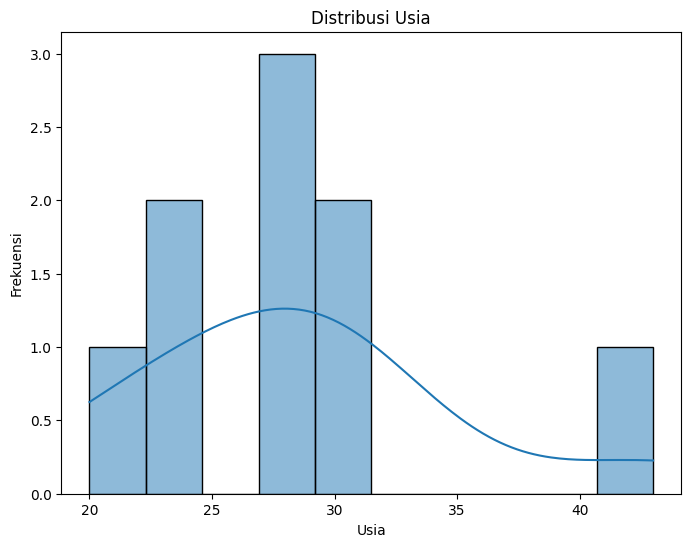

In [33]:
# Visualisasi distribusi usia
plt.figure(figsize=(8, 6))
sns.histplot(df['USIA'], bins=10, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


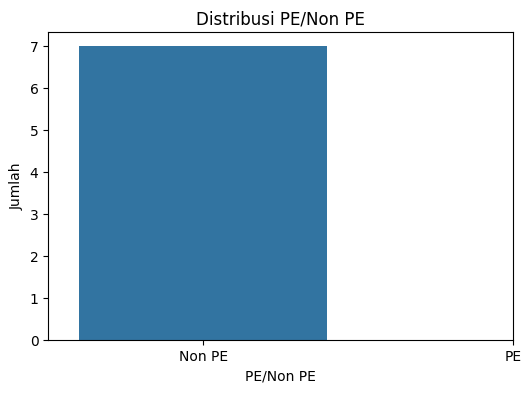

In [35]:
# Bar plot untuk variabel PE/Non PE
plt.figure(figsize=(6, 4))
sns.countplot(x='PE/Non PE', data=df)
plt.title('Distribusi PE/Non PE')
plt.xlabel('PE/Non PE')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Non PE', 'PE'])
plt.show()

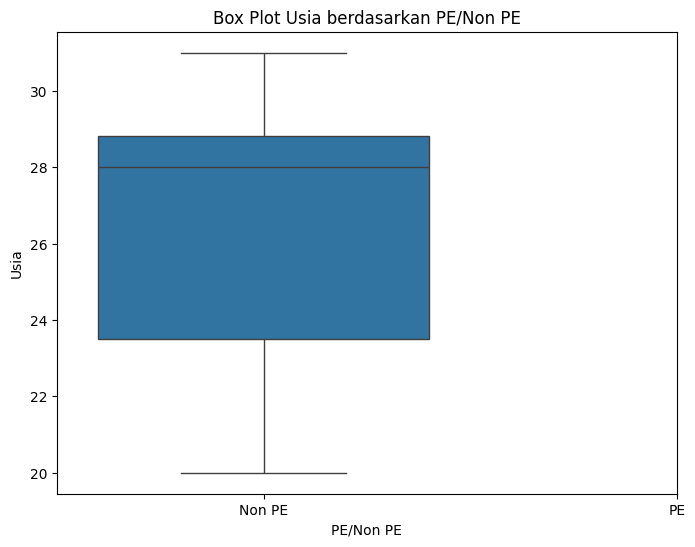

In [36]:
# Box plot usia berdasarkan PE/Non PE
plt.figure(figsize=(8, 6))
sns.boxplot(x='PE/Non PE', y='USIA', data=df)
plt.title('Box Plot Usia berdasarkan PE/Non PE')
plt.xlabel('PE/Non PE')
plt.ylabel('Usia')
plt.xticks([0, 1], ['Non PE', 'PE'])
plt.show()